# Analysis of spectra, images and light curves for occulted RHESSI flares from 2002-2004 and 2011-2015

by Frederic Effenberger

Published in Effenberger et al. 2017, ApJ, http://iopscience.iop.org/article/10.3847/1538-4357/835/2/124/meta 

We analyze two data sets of occulted flares from solar cycle 23 and 24 with different spectral fits, in their high and low energy spatial seperation and their light curves as correlated with the soft X-ray GOES flux. Additional STEREO height and equivalent GOES class information is included, when available.

This notebook gives the methods that were used to create the figures and do the analysis based on the results. The
high level results are provided in two csv files 'Occulted_Results_23.csv' and 'Occulted_Results_24.csv'.

The quantities (columns) are:

**Date** Date of the fitted (non-thermal) peak of the flare <br />
**Time** Time (UT) of the fitted (non-thermal) peak of the flare <br />
**GOES** Observed GOES class <br />
**Pos_X** RHESSI solar X position in arcsec <br />
**Pos_Y** RHESSI solar Y position in arcsec <br />
**Stereo** Calculated GOES class from STEREO UV flux <br />
**T_vth** Temperature of the thermal component in the thermal plus broken power-law spectral fit in MK <br />
**E_break** Break energy of the broken power-law spectral fit in keV <br />
**gamma** High energy spectral photon index of the broken power-law <br />
**T_vth_kappa** Temperature of the thermal component in the thin-target kappa spectral fit in MK<br />
**T_kappa** Temperature of the kappa component in the thin-target kappa spectral fit in MK<br />
**kappa** Electron kappa spectral index in the thin-target kappa spectral fit<br />
**d_max** Radial separation of the high and low energy emission maxima from clean imaging <br />
**d_com** Radial separation of the high and low energy emission center of mass from clean imaging <br />
**A** Area of the 50% low-energy image contour in cm^2<br />
**F_th** Total thermal energy flux calculated from the thermal component in the broken power-law fit in keV/cm^2/s<br />
**F_nth** Total non-thermal energy flux calculated from the broken power-law component in keV/cm^2/s <br />
**tau_cross** Crossing time calculated from the Area for a particle energy of 15 keV in s <br />
**tau_loss** Energy loss time estimated from the density in s <br />
**n** Density estimated from the emission measure and volume in 1/cm^3 <br />
**goes_corr_high** Correlation coefficient between the time derivative of the GOES high energy channel and RHESSI <br />
**goes_corr_low** Correlation coefficient between the time derivative of the GOES low energy channel and RHESSI<br />
**goes_lag_high** Lag between the time derivative of the GOES high energy channel and RHESSI<br />
**goes_lag_low** Lag between the time derivative of the GOES low energy channel and RHESSI<br />
**gamma_err** 1 sigma error of gamma from detector average <br />
**kappa_err** 1 sigma error of kappa from detector average <br />
**level** A flux level proportional to the goes class to quantify the magnitude of the flare <br />

**See the above publication for more details and please cite it if you use these results.** 

In [14]:
# Some packages and settings
from __future__ import print_function
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
minorLocator = AutoMinorLocator()
from datetime import datetime
matplotlib.rcParams['font.size'] = 30
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
matplotlib.rcParams['axes.linewidth'] = 1.5
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['xtick.minor.size'] = 6
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['xtick.minor.width'] = 1
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 6
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.minor.width'] = 1
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",200)
import scipy.io

## Data import and basic statistics

In [15]:
fit_resK = pd.read_csv('Occulted_Results_23.csv', sep=',', index_col=0)
print("Total Flares: ", len(fit_resK))    
print("Flares with gamma:", len(fit_resK.gamma[np.invert(np.isnan(fit_resK.gamma))]))
print("Flares with kappa:", len(fit_resK.kappa[np.invert(np.isnan(fit_resK.kappa))]))
print("Flares with offset:", len(fit_resK.d_max[np.invert(np.isnan(fit_resK.d_max))]))
print("Flares with GOES correlation:", len(fit_resK.goes_corr_high[np.invert(np.isnan(fit_resK.goes_corr_high))]))
print(fit_resK.describe())
print(fit_resK.head(2))
print(fit_resK.tail(2))

Total Flares:  55
Flares with gamma: 52
Flares with kappa: 48
Flares with offset: 52
Flares with GOES correlation: 35
             Pos_X       Pos_Y      T_vth    E_break      gamma  T_vth_kappa  \
count    55.000000   55.000000  54.000000  52.000000  52.000000    48.000000   
mean   -188.766164  -56.588667  24.187418  17.541939   5.736482    19.735121   
std     918.770922  266.377839   4.578465   2.451828   1.157801     5.175175   
min   -1002.440000 -445.731000  10.131320  11.082215   3.232524    11.300623   
25%    -939.212000 -284.867500  21.484825  16.850764   5.036395    15.700207   
50%    -904.495000 -176.351000  24.131328  17.703265   5.677304    18.986820   
75%     915.508500  197.249500  26.950036  19.046362   6.457287    21.641238   
max     967.937000  499.566000  33.862023  22.602315   8.460280    32.910480   

         T_kappa      kappa      d_max      d_com             A          F_th  \
count  48.000000  48.000000  52.000000  52.000000  5.400000e+01  5.200000e+01   

In [16]:
fit_resO = pd.read_csv('Occulted_Results_24.csv', sep=',', index_col=0)
print("Total Flares: ", len(fit_resO))    
print("Flares with gamma:", len(fit_resO.gamma[np.invert(np.isnan(fit_resO.gamma))]))
print("Flares with kappa:", len(fit_resO.kappa[np.invert(np.isnan(fit_resO.kappa))]))
print("Flares with offset:", len(fit_resO.d_max[np.invert(np.isnan(fit_resO.d_max))]))
print("Flares with GOES correlation:", len(fit_resO.goes_corr_high[np.invert(np.isnan(fit_resO.goes_corr_high))]))
print("Flares with STEREO height:", len(fit_resO.H[np.invert(np.isnan(fit_resO.H))]))
print(fit_resO.describe())
print(fit_resO.head(2))
print(fit_resO.tail(2))

Total Flares:  61
Flares with gamma: 37
Flares with kappa: 29
Flares with offset: 35
Flares with GOES correlation: 22
Flares with STEREO height: 35
            Pos_X       Pos_Y          H      T_vth    E_break      gamma  \
count   61.000000   61.000000  35.000000  61.000000  37.000000  37.000000   
mean  -261.164885   17.393947  14.060363  24.037919  16.139784   5.566446   
std    908.745089  252.853042  10.269316   5.226134   3.112118   1.477497   
min   -996.784000 -400.281000   1.914856  10.721163  10.039340   3.220551   
25%   -945.362000 -260.552000   7.415965  20.052407  13.312985   4.348430   
50%   -915.713000   90.585000  11.288543  23.713515  16.615771   5.496529   
75%    921.504000  242.562000  17.767077  26.476457  18.674501   6.703506   
max    982.082000  370.615000  51.738476  34.554422  23.189531   8.484405   

       T_vth_kappa    T_kappa      kappa      d_max      d_com             A  \
count    29.000000  29.000000  29.000000  35.000000  35.000000  6.100000e+01  

In [17]:
# combine all results into one table, fit_res
fit_res = pd.concat([fit_resK,fit_resO])
#fit_res = fit_res[pd.notnull(fit_res['temp'])] # Discard flares that have no temperature fit
print("Total Flares: ", len(fit_res))    
print("Flares with gamma:", len(fit_res.gamma[np.invert(np.isnan(fit_res.gamma))]))
print("Flares with kappa:", len(fit_res.kappa[np.invert(np.isnan(fit_res.kappa))]))
print("Flares with offset:", len(fit_res.d_max[np.invert(np.isnan(fit_res.d_max))]))
print("Flares with GOES correlation:", len(fit_res.goes_corr_high[np.invert(np.isnan(fit_res.goes_corr_high))]))
print("Flares with STEREO height:", len(fit_res.H[np.invert(np.isnan(fit_res.H))]))
print(fit_res.describe())
#fit_res.to_csv(path_or_buf='full_output.csv')

Total Flares:  116
Flares with gamma: 89
Flares with kappa: 77
Flares with offset: 87
Flares with GOES correlation: 57
Flares with STEREO height: 35
                  A    E_break         F_nth          F_th          H  \
count  1.150000e+02  89.000000  8.900000e+01  8.900000e+01  35.000000   
mean   2.053849e+18  16.959021  6.113270e+06  4.720738e+06  14.060363   
std    1.354274e+18   2.815857  1.472214e+07  1.797498e+07  10.269316   
min    8.055757e+17  10.039340  3.148010e+01  1.568938e+03   1.914856   
25%    1.200414e+18  15.219819  3.155783e+04  6.499615e+04   7.415965   
50%    1.627051e+18  17.414577  2.822081e+05  2.113794e+05  11.288543   
75%    2.347829e+18  18.894687  1.649911e+06  1.411259e+06  17.767077   
max    8.734136e+18  23.189531  7.518745e+07  1.295327e+08  51.738476   

             Pos_X       Pos_Y    T_kappa       T_vth  T_vth_kappa      d_com  \
count   116.000000  116.000000  77.000000  115.000000    77.000000  87.000000   
mean   -226.837905  -17.684017 

## Histograms

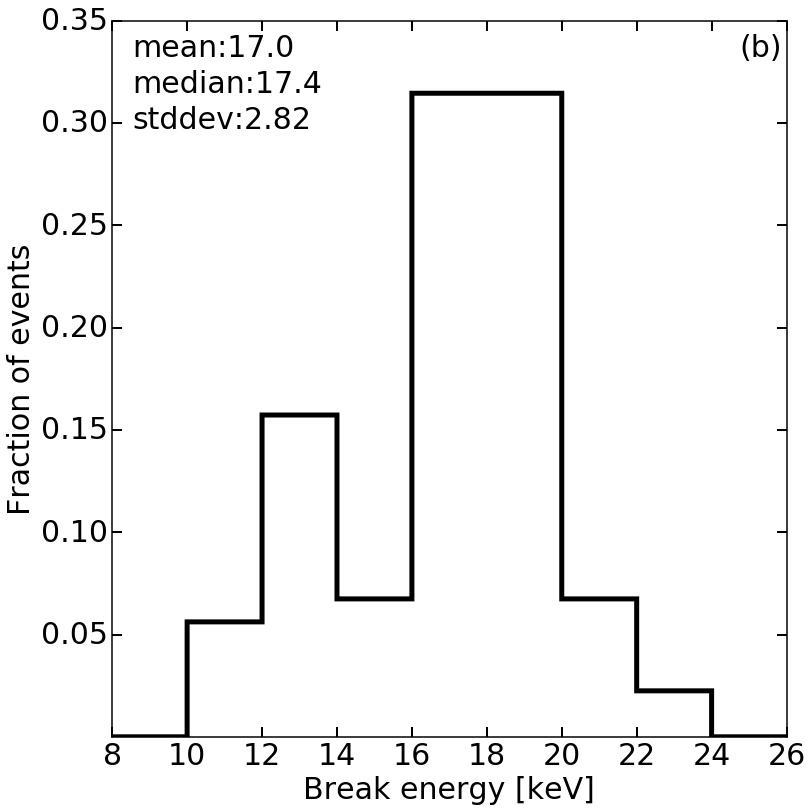

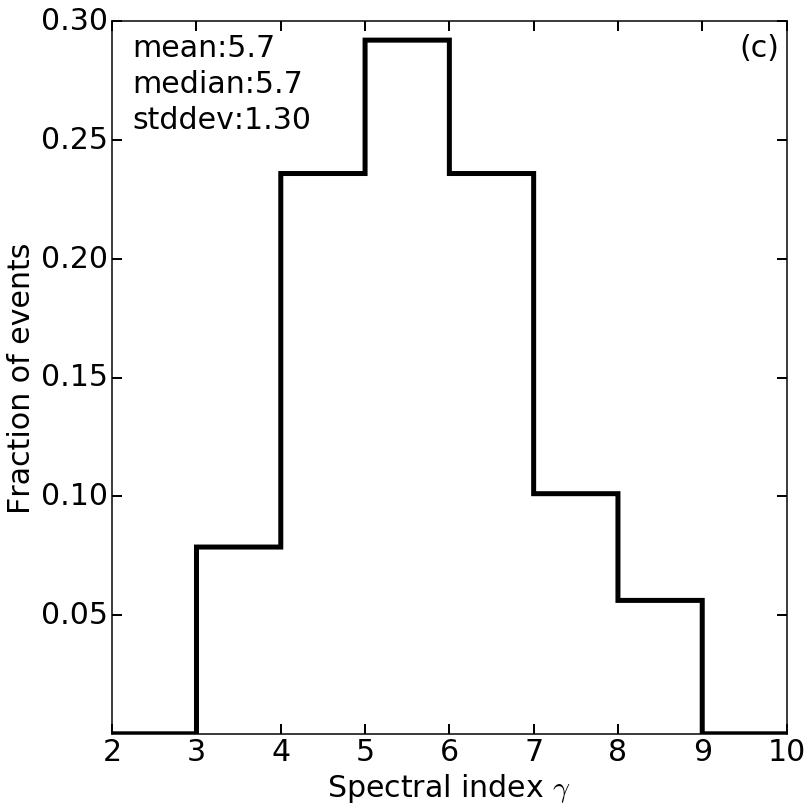

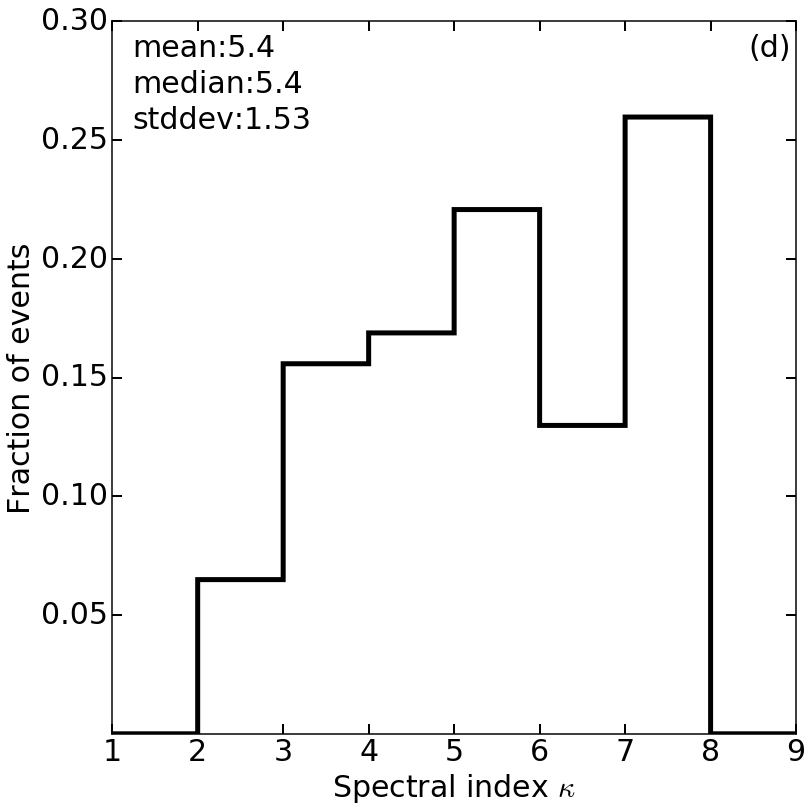

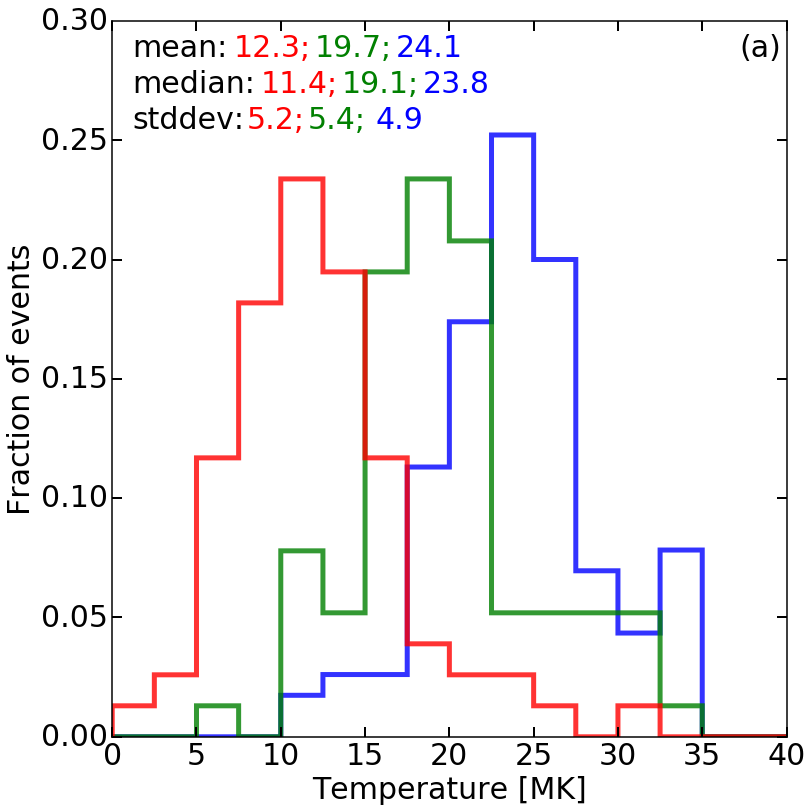

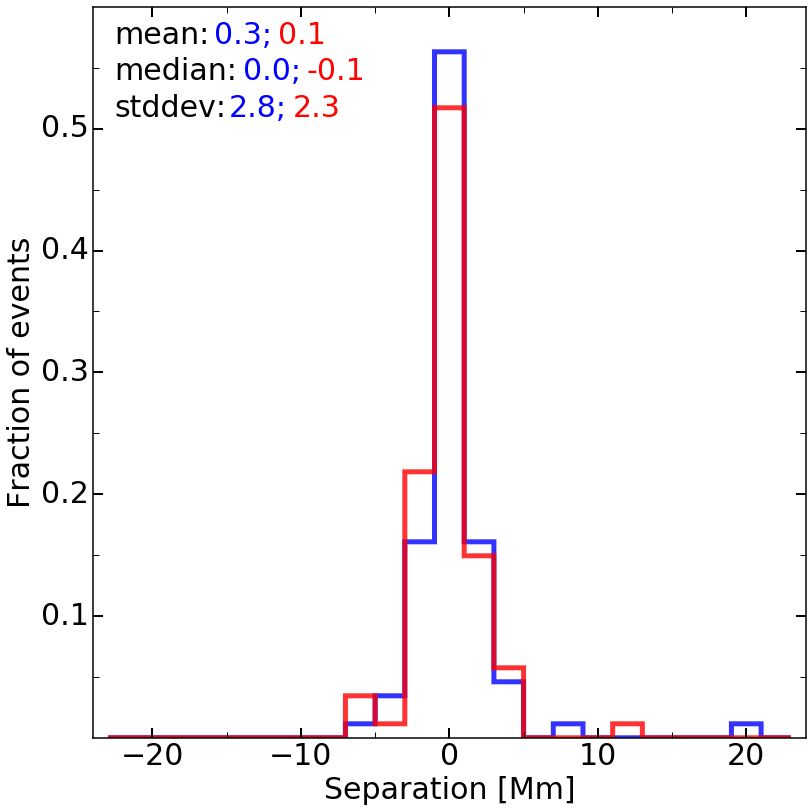

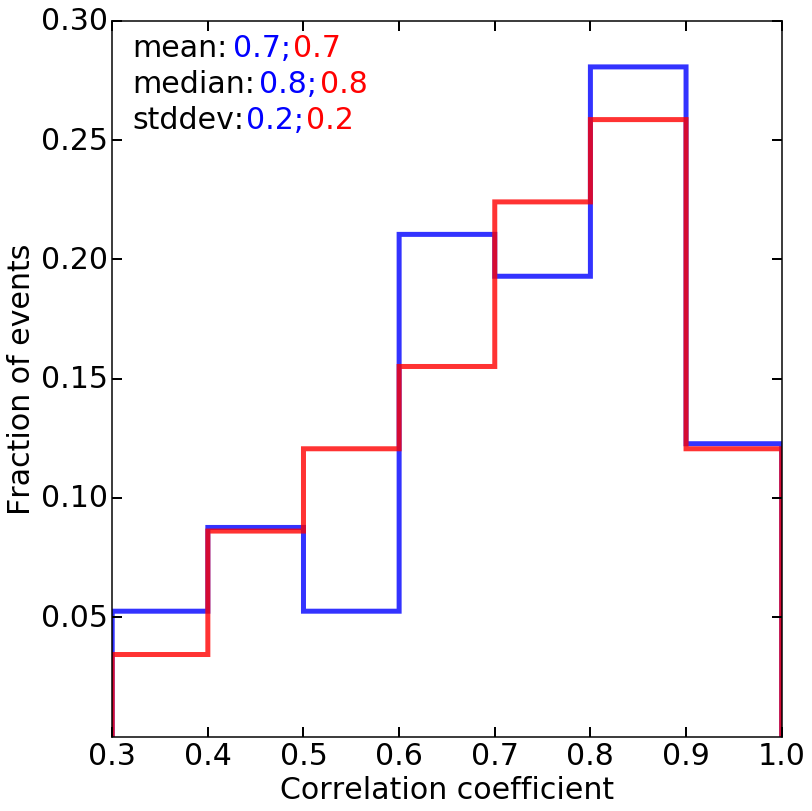

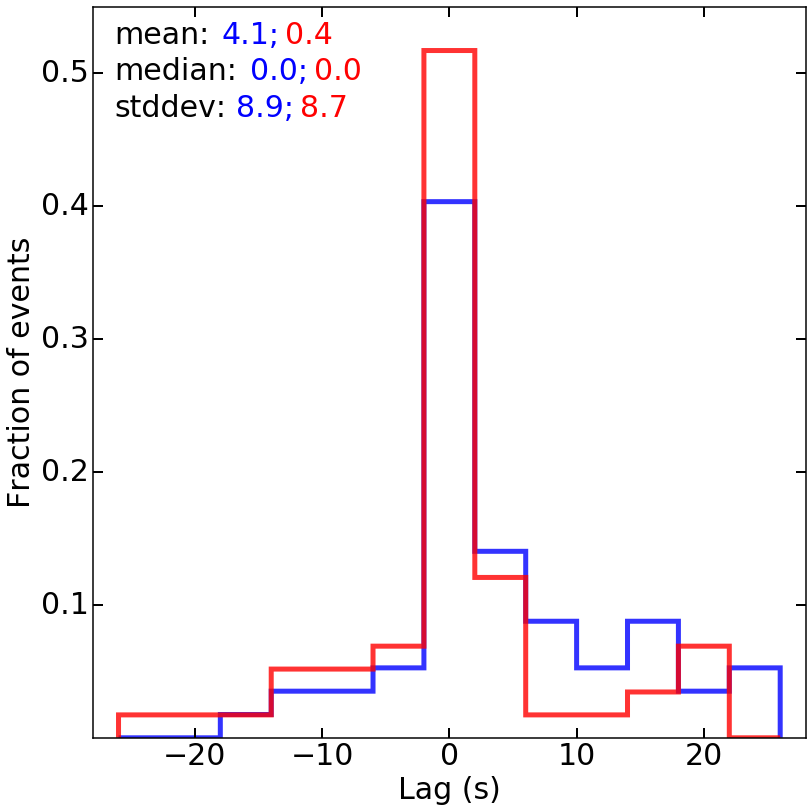

In [18]:
# Ebreak
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
fit_res.E_break.plot(kind='hist', normed=False, alpha=1.0, ax=ax1, bins=np.arange(8.,28.,2.),
                    weights=np.ones_like(fit_res.E_break.dropna().values)/len(fit_res.E_break.dropna()),
                    fill=False, lw=5, edgecolor='black',histtype='step')
ax1.set_xlim(8,26)
ax1.set_ylim(0.0,0.35)
ax1.set_yticks([0.05,0.1,0.15,0.2,0.25,0.3,0.35])
ax1.set_xlabel("Break energy [keV]")
ax1.set_ylabel("Fraction of events")
ax1.annotate('(b)', xy=(0.93, 0.95), xycoords='axes fraction')
ax1.annotate('mean:'+ "%2.1f" % fit_res.E_break.mean(), xy=(0.03, 0.95), xycoords='axes fraction')
ax1.annotate('median:'+ "%2.1f" % fit_res.E_break.median(), xy=(0.03, 0.90), xycoords='axes fraction')
ax1.annotate('stddev:'+ "%2.2f" % fit_res.E_break.std(), xy=(0.03, 0.85), xycoords='axes fraction')
fig1.tight_layout()
fig1.savefig('ebreak_hist.pdf')

# gamma
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111)
fit_res.gamma.plot(kind='hist', normed=False, alpha=1.0, ax=ax2, bins=np.arange(2.,11.,1.),
                   weights=np.ones_like(fit_res.gamma.dropna().values)/len(fit_res.gamma.dropna()),
                  fill=False, lw=5, edgecolor='black',histtype='step')
ax2.set_xlim(2,10)
ax2.set_ylim(0.0,0.30)
ax2.set_yticks([0.05,0.1,0.15,0.2,0.25,0.3])
ax2.set_xlabel("Spectral index $\gamma$")
ax2.set_ylabel("Fraction of events")
ax2.annotate('(c)', xy=(0.93, 0.95), xycoords='axes fraction')
ax2.annotate('mean:'+ "%2.1f" % fit_res.gamma.mean(), xy=(0.03, 0.95), xycoords='axes fraction')
ax2.annotate('median:'+ "%2.1f" % fit_res.gamma.median(), xy=(0.03, 0.90), xycoords='axes fraction')
ax2.annotate('stddev:'+ "%2.2f" % fit_res.gamma.std(), xy=(0.03, 0.85), xycoords='axes fraction')
fig2.tight_layout()
fig2.savefig('gamma_hist.pdf')

# kappa
fig4 = plt.figure(4)
ax4 = fig4.add_subplot(111)
fit_res.kappa.plot(kind='hist', normed=False, alpha=1.0, ax=ax4, bins=np.arange(1.,10.,1.),
                   weights=np.ones_like(fit_res.kappa.dropna().values)/len(fit_res.kappa.dropna()),
                   fill=False, lw=5, edgecolor='black',histtype='step') #ls='dashed',))
ax4.set_xlim(1,9)
ax4.set_ylim(0.0,0.30)
ax4.set_yticks([0.05,0.1,0.15,0.2,0.25,0.3])#, labels, rotation='vertical')
ax4.set_xlabel("Spectral index $\kappa$")
ax4.set_ylabel("Fraction of events")
ax4.annotate('(d)', xy=(0.93, 0.95), xycoords='axes fraction')
ax4.annotate('mean:'+ "%2.1f" % fit_res.kappa.mean(), xy=(0.03, 0.95), xycoords='axes fraction')
ax4.annotate('median:'+ "%2.1f" % fit_res.kappa.median(), xy=(0.03, 0.90), xycoords='axes fraction')
ax4.annotate('stddev:'+ "%2.2f" % fit_res.kappa.std(), xy=(0.03, 0.85), xycoords='axes fraction')
fig4.tight_layout()
fig4.savefig('kappa_hist.pdf')

# Temp
fig6 = plt.figure(6)
ax6 = fig6.add_subplot(111)
fit_res.T_vth.plot(kind='hist', normed=False, alpha=0.8, ax=ax6, bins=np.arange(0,42.5,2.5),
                  weights=np.ones_like(fit_res.T_vth.dropna().values)/len(fit_res.T_vth.dropna()),
                 fill=False, lw=5, edgecolor='blue',histtype='step')
fit_res.T_vth_kappa.plot(kind='hist', normed=False, alpha=0.8, ax=ax6, bins=np.arange(0,42.5,2.5),
                   weights=np.ones_like(fit_res.T_vth_kappa.dropna().values)/len(fit_res.T_vth_kappa.dropna()),
                   fill=False, lw=5, edgecolor='green',histtype='step')
fit_res.T_kappa.plot(kind='hist', normed=False, alpha=0.8, ax=ax6, bins=np.arange(0,42.5,2.5),
                   weights=np.ones_like(fit_res.T_kappa.dropna().values)/len(fit_res.T_kappa.dropna()),
                   fill=False, lw=5, edgecolor='red',histtype='step')
ax6.set_xlim(0,40)
ax6.set_ylim(0.0,0.30)
ax6.set_xlabel("Temperature [MK]")
ax6.set_ylabel("Fraction of events")
ax6.annotate('(a)', xy=(0.93, 0.95), xycoords='axes fraction')
ax6.annotate('mean:', xy=(0.03, 0.95), xycoords='axes fraction')
ax6.annotate("%2.1f;" % fit_res.T_kappa.mean(), xy=(0.18, 0.95), xycoords='axes fraction', color='red')
ax6.annotate("%2.1f;" % fit_res.T_vth_kappa.mean(), xy=(0.30, 0.95), xycoords='axes fraction', color='green')
ax6.annotate("%2.1f" % fit_res.T_vth.mean(), xy=(0.42, 0.95), xycoords='axes fraction', color='blue')
ax6.annotate('median:', xy=(0.03, 0.90), xycoords='axes fraction')
ax6.annotate("%2.1f;" % fit_res.T_kappa.median(), xy=(0.22, 0.90), xycoords='axes fraction', color='red')
ax6.annotate("%2.1f;" % fit_res.T_vth_kappa.median(), xy=(0.34, 0.90), xycoords='axes fraction', color='green')
ax6.annotate("%2.1f" % fit_res.T_vth.median(), xy=(0.46, 0.90), xycoords='axes fraction', color='blue')
ax6.annotate('stddev:', xy=(0.03, 0.85), xycoords='axes fraction')
ax6.annotate("%2.1f;" % fit_res.T_kappa.std(), xy=(0.20, 0.85), xycoords='axes fraction', color='red')
ax6.annotate("%2.1f;" % fit_res.T_vth_kappa.std(), xy=(0.29, 0.85), xycoords='axes fraction', color='green')
ax6.annotate("%2.1f" % fit_res.T_vth.std(), xy=(0.39, 0.85), xycoords='axes fraction', color='blue')
fig6.tight_layout()
fig6.savefig('T_hist.pdf')

# sep
fig7 = plt.figure(7)
ax7 = fig7.add_subplot(111)
fit_res.d_max.plot(kind='hist', normed=False, alpha=0.8, ax=ax7, bins=np.arange(-23.,25.,2.),
                     weights=np.ones_like(fit_res.d_max.dropna().values)/len(fit_res.d_max.dropna()),
                     fill=False, lw=5, edgecolor='blue',histtype='step')
fit_res.d_com.plot(kind='hist', normed=False, alpha=0.8, ax=ax7, bins=np.arange(-23,25,2.),
                     weights=np.ones_like(fit_res.d_com.dropna().values)/len(fit_res.d_com.dropna()),
                     fill=False, lw=5, edgecolor='red',histtype='step')
ax7.set_xlim(-24,24)
ax7.set_yticks([0.1,0.2,0.3,0.4,0.5])
ax7.set_ylim(0.0,0.6)
ax7.set_xlabel("Separation [Mm]")
ax7.set_ylabel("Fraction of events")
ax7.annotate('mean:', xy=(0.03, 0.95), xycoords='axes fraction')
ax7.annotate("%2.1f;" % fit_res.d_max.mean(), xy=(0.17, 0.95), xycoords='axes fraction', color='blue')
ax7.annotate("%2.1f" % fit_res.d_com.mean(), xy=(0.26, 0.95), xycoords='axes fraction', color='red')
ax7.annotate('median:', xy=(0.03, 0.90), xycoords='axes fraction')
ax7.annotate("%2.1f;" % fit_res.d_max.median(), xy=(0.21, 0.90), xycoords='axes fraction', color='blue')
ax7.annotate("%2.1f" % fit_res.d_com.median(), xy=(0.30, 0.90), xycoords='axes fraction', color='red')
ax7.annotate('stddev:', xy=(0.03, 0.85), xycoords='axes fraction')
ax7.annotate("%2.1f;" % fit_res.d_max.std(), xy=(0.19, 0.85), xycoords='axes fraction', color='blue')
ax7.annotate("%2.1f" % fit_res.d_com.std(), xy=(0.28, 0.85), xycoords='axes fraction', color='red')
ax7.xaxis.set_minor_locator(AutoMinorLocator(2))
ax7.yaxis.set_minor_locator(AutoMinorLocator(2))
fig7.tight_layout()
fig7.savefig('offset_hist.pdf')

# GOES correlation coeff
fig8 = plt.figure(8)
ax8 = fig8.add_subplot(111)
fit_res.goes_corr_high.plot(kind='hist', normed=False, alpha=0.8, ax=ax8, bins=np.arange(0.3,1.1,0.1),
                      weights=np.ones_like(fit_res.goes_corr_high.dropna().values)/len(fit_res.goes_corr_high.dropna()),
                      fill=False, lw=5, edgecolor='blue',histtype='step')
fit_res.goes_corr_low.plot(kind='hist', normed=False, alpha=0.8, ax=ax8, bins=np.arange(0.3,1.1,0.1),
                      weights=np.ones_like(fit_res.goes_corr_low.dropna().values)/len(fit_res.goes_corr_low.dropna()),
                      fill=False, lw=5, edgecolor='red',histtype='step')
ax8.set_xlim(0.3,1)
ax8.set_yticks([0.05,0.1,0.15,0.2,0.25,0.3])
ax8.set_xlabel("Correlation coefficient")
ax8.set_ylabel("Fraction of events")
ax8.annotate('mean:', xy=(0.03, 0.95), xycoords='axes fraction')
ax8.annotate("%2.1f;" % fit_res.goes_corr_high.mean(), xy=(0.18, 0.95), xycoords='axes fraction', color='blue')
ax8.annotate("%2.1f" % fit_res.goes_corr_low.mean(), xy=(0.27, 0.95), xycoords='axes fraction', color='red')
ax8.annotate('median:', xy=(0.03, 0.90), xycoords='axes fraction')
ax8.annotate("%2.1f;" % fit_res.goes_corr_high.median(), xy=(0.22, 0.90), xycoords='axes fraction', color='blue')
ax8.annotate("%2.1f" % fit_res.goes_corr_low.median(), xy=(0.31, 0.90), xycoords='axes fraction', color='red')
ax8.annotate('stddev:', xy=(0.03, 0.85), xycoords='axes fraction')
ax8.annotate("%2.1f;" % fit_res.goes_corr_high.std(), xy=(0.20, 0.85), xycoords='axes fraction', color='blue')
ax8.annotate("%2.1f" % fit_res.goes_corr_low.std(), xy=(0.29, 0.85), xycoords='axes fraction', color='red')
ax8.xaxis.set_minor_locator(AutoMinorLocator(0))
ax8.yaxis.set_minor_locator(AutoMinorLocator(0))
fig8.tight_layout()
fig8.savefig('GOES_corr_hist.pdf')

# GOES lag
fig9 = plt.figure(9)
ax9 = fig9.add_subplot(111)
fit_res.goes_lag_high.plot(kind='hist', normed=False, alpha=0.8, ax=ax9, bins=np.arange(-26,30,4.),
                     weights=np.ones_like(fit_res.goes_lag_high.dropna().values)/len(fit_res.goes_lag_high.dropna()),
                     fill=False, lw=5, edgecolor='blue',histtype='step')
fit_res.goes_lag_low.plot(kind='hist', normed=False, alpha=0.8, ax=ax9, bins=np.arange(-26,30,4.),
                     weights=np.ones_like(fit_res.goes_lag_low.dropna().values)/len(fit_res.goes_lag_low.dropna()),
                     fill=False, lw=5, edgecolor='red',histtype='step')
ax9.set_xlim(-28,28)
ax9.set_ylim(0.0,0.55)
ax9.set_yticks([0.1,0.2,0.3,0.4,0.5])
ax9.set_xlabel("Lag (s)")
ax9.set_ylabel("Fraction of events")
ax9.annotate('mean:', xy=(0.03, 0.95), xycoords='axes fraction')
ax9.annotate("%2.1f;" % fit_res.goes_lag_high.mean(), xy=(0.18, 0.95), xycoords='axes fraction', color='blue')
ax9.annotate("%2.1f" % fit_res.goes_lag_low.mean(), xy=(0.27, 0.95), xycoords='axes fraction', color='red')
ax9.annotate('median:', xy=(0.03, 0.90), xycoords='axes fraction')
ax9.annotate("%2.1f;" % fit_res.goes_lag_high.median(), xy=(0.22, 0.90), xycoords='axes fraction', color='blue')
ax9.annotate("%2.1f" % fit_res.goes_lag_low.median(), xy=(0.31, 0.90), xycoords='axes fraction', color='red')
ax9.annotate('stddev:', xy=(0.03, 0.85), xycoords='axes fraction')
ax9.annotate("%2.1f;" % fit_res.goes_lag_high.std(), xy=(0.20, 0.85), xycoords='axes fraction', color='blue')
ax9.annotate("%2.1f" % fit_res.goes_lag_low.std(), xy=(0.29, 0.85), xycoords='axes fraction', color='red')
ax9.xaxis.set_minor_locator(AutoMinorLocator(0))
ax9.yaxis.set_minor_locator(AutoMinorLocator(0))
fig9.tight_layout()
fig9.savefig('GOES_lag_hist.pdf')
fig9.show()

## Linear correlations

In [19]:
col_names = ['A','E_break','F_nth','F_th','H','Pos_X','Pos_Y','T_kappa','T_vth','T_vth_kappa',\
             'd_com','d_max','gamma','goes_corr_high','goes_corr_low', 'goes_lag_high', 'goes_lag_low',\
             'kappa','level','n','tau_cross','tau_loss']
fit_res.corr()

,A,E_break,F_nth,F_th,H,Pos_X,Pos_Y,T_kappa,T_vth,T_vth_kappa,d_com,d_max,gamma,gamma_err,goes_corr_high,goes_corr_low,goes_lag_high,goes_lag_low,kappa,kappa_err,level,n,tau_cross,tau_loss
A,1.000000,-0.239269,0.059101,0.047749,0.277621,-0.011857,-0.192365,0.053001,-0.210453,-0.283316,-0.008495,0.041743,0.169520,-0.121066,-0.045706,-0.386109,0.123465,-0.031562,0.357343,-0.216738,-0.103183,-0.188967,0.985104,0.358512
E_break,-0.239269,1.000000,-0.020990,-0.048244,-0.411435,-0.016439,0.084566,0.129438,0.508452,0.170228,-0.020049,0.005438,-0.032137,0.096490,0.103767,0.209206,-0.199832,-0.126271,0.292676,-0.169440,0.222166,-0.065189,-0.218371,-0.357779
F_nth,0.059101,-0.020990,1.000000,0.441064,-0.082679,0.080085,-0.088282,0.219121,-0.042392,-0.114538,0.032325,0.083699,0.258205,-0.051549,-0.059267,0.111133,-0.072020,-0.020268,0.226300,-0.070344,0.067958,0.140077,0.064798,-0.068512
F_th,0.047749,-0.048244,0.441064,1.000000,-0.262860,-0.056205,-0.141523,0.088966,-0.089640,-0.182354,0.192298,0.261460,0.049320,-0.121085,0.139342,0.179247,-0.004589,0.033666,0.140106,-0.000780,0.194133,0.399334,0.037459,-0.095318
H,0.277621,-0.411435,-0.082679,-0.262860,1.000000,-0.235679,-0.111436,0.460905,-0.111962,-0.033294,0.001848,-0.034118,0.153235,0.683513,-0.543202,-0.082065,0.341583,0.134265,0.571459,0.173931,-0.195537,-0.309877,0.326220,0.301913
Pos_X,-0.011857,-0.016439,0.080085,-0.056205,-0.235679,1.000000,0.039115,-0.009328,-0.070729,0.002768,-0.195045,-0.177107,-0.011669,-0.057606,-0.188189,-0.022766,0.152864,-0.123593,-0.026521,-0.077441,0.013466,-0.044985,-0.036106,-0.049647
Pos_Y,-0.192365,0.084566,-0.088282,-0.141523,-0.111436,0.039115,1.000000,0.222961,0.146885,0.057741,-0.182486,-0.142787,-0.156444,-0.061237,0.045303,0.148338,0.045218,-0.046560,-0.054478,0.090965,-0.065485,-0.155993,-0.190911,-0.063549
T_kappa,0.053001,0.129438,0.219121,0.088966,0.460905,-0.009328,0.222961,1.000000,0.443882,0.090874,-0.074027,-0.029565,0.264448,0.068184,0.093518,0.178838,-0.034393,0.045456,0.547138,0.307366,0.042471,-0.153026,0.073546,0.068792
T_vth,-0.210453,0.508452,-0.042392,-0.089640,-0.111962,-0.070729,0.146885,0.443882,1.000000,0.482888,-0.200929,-0.190077,-0.237046,0.180001,-0.068938,0.071234,0.093869,0.057998,-0.027238,0.195136,-0.043440,-0.361029,-0.189493,0.254776
T_vth_kappa,-0.283316,0.170228,-0.114538,-0.182354,-0.033294,0.002768,0.057741,0.090874,0.482888,1.000000,-0.217424,-0.226842,-0.009142,0.184028,0.059259,0.119699,0.168452,-0.063192,-0.142834,0.185820,-0.026490,-0.169023,-0.277014,0.018013


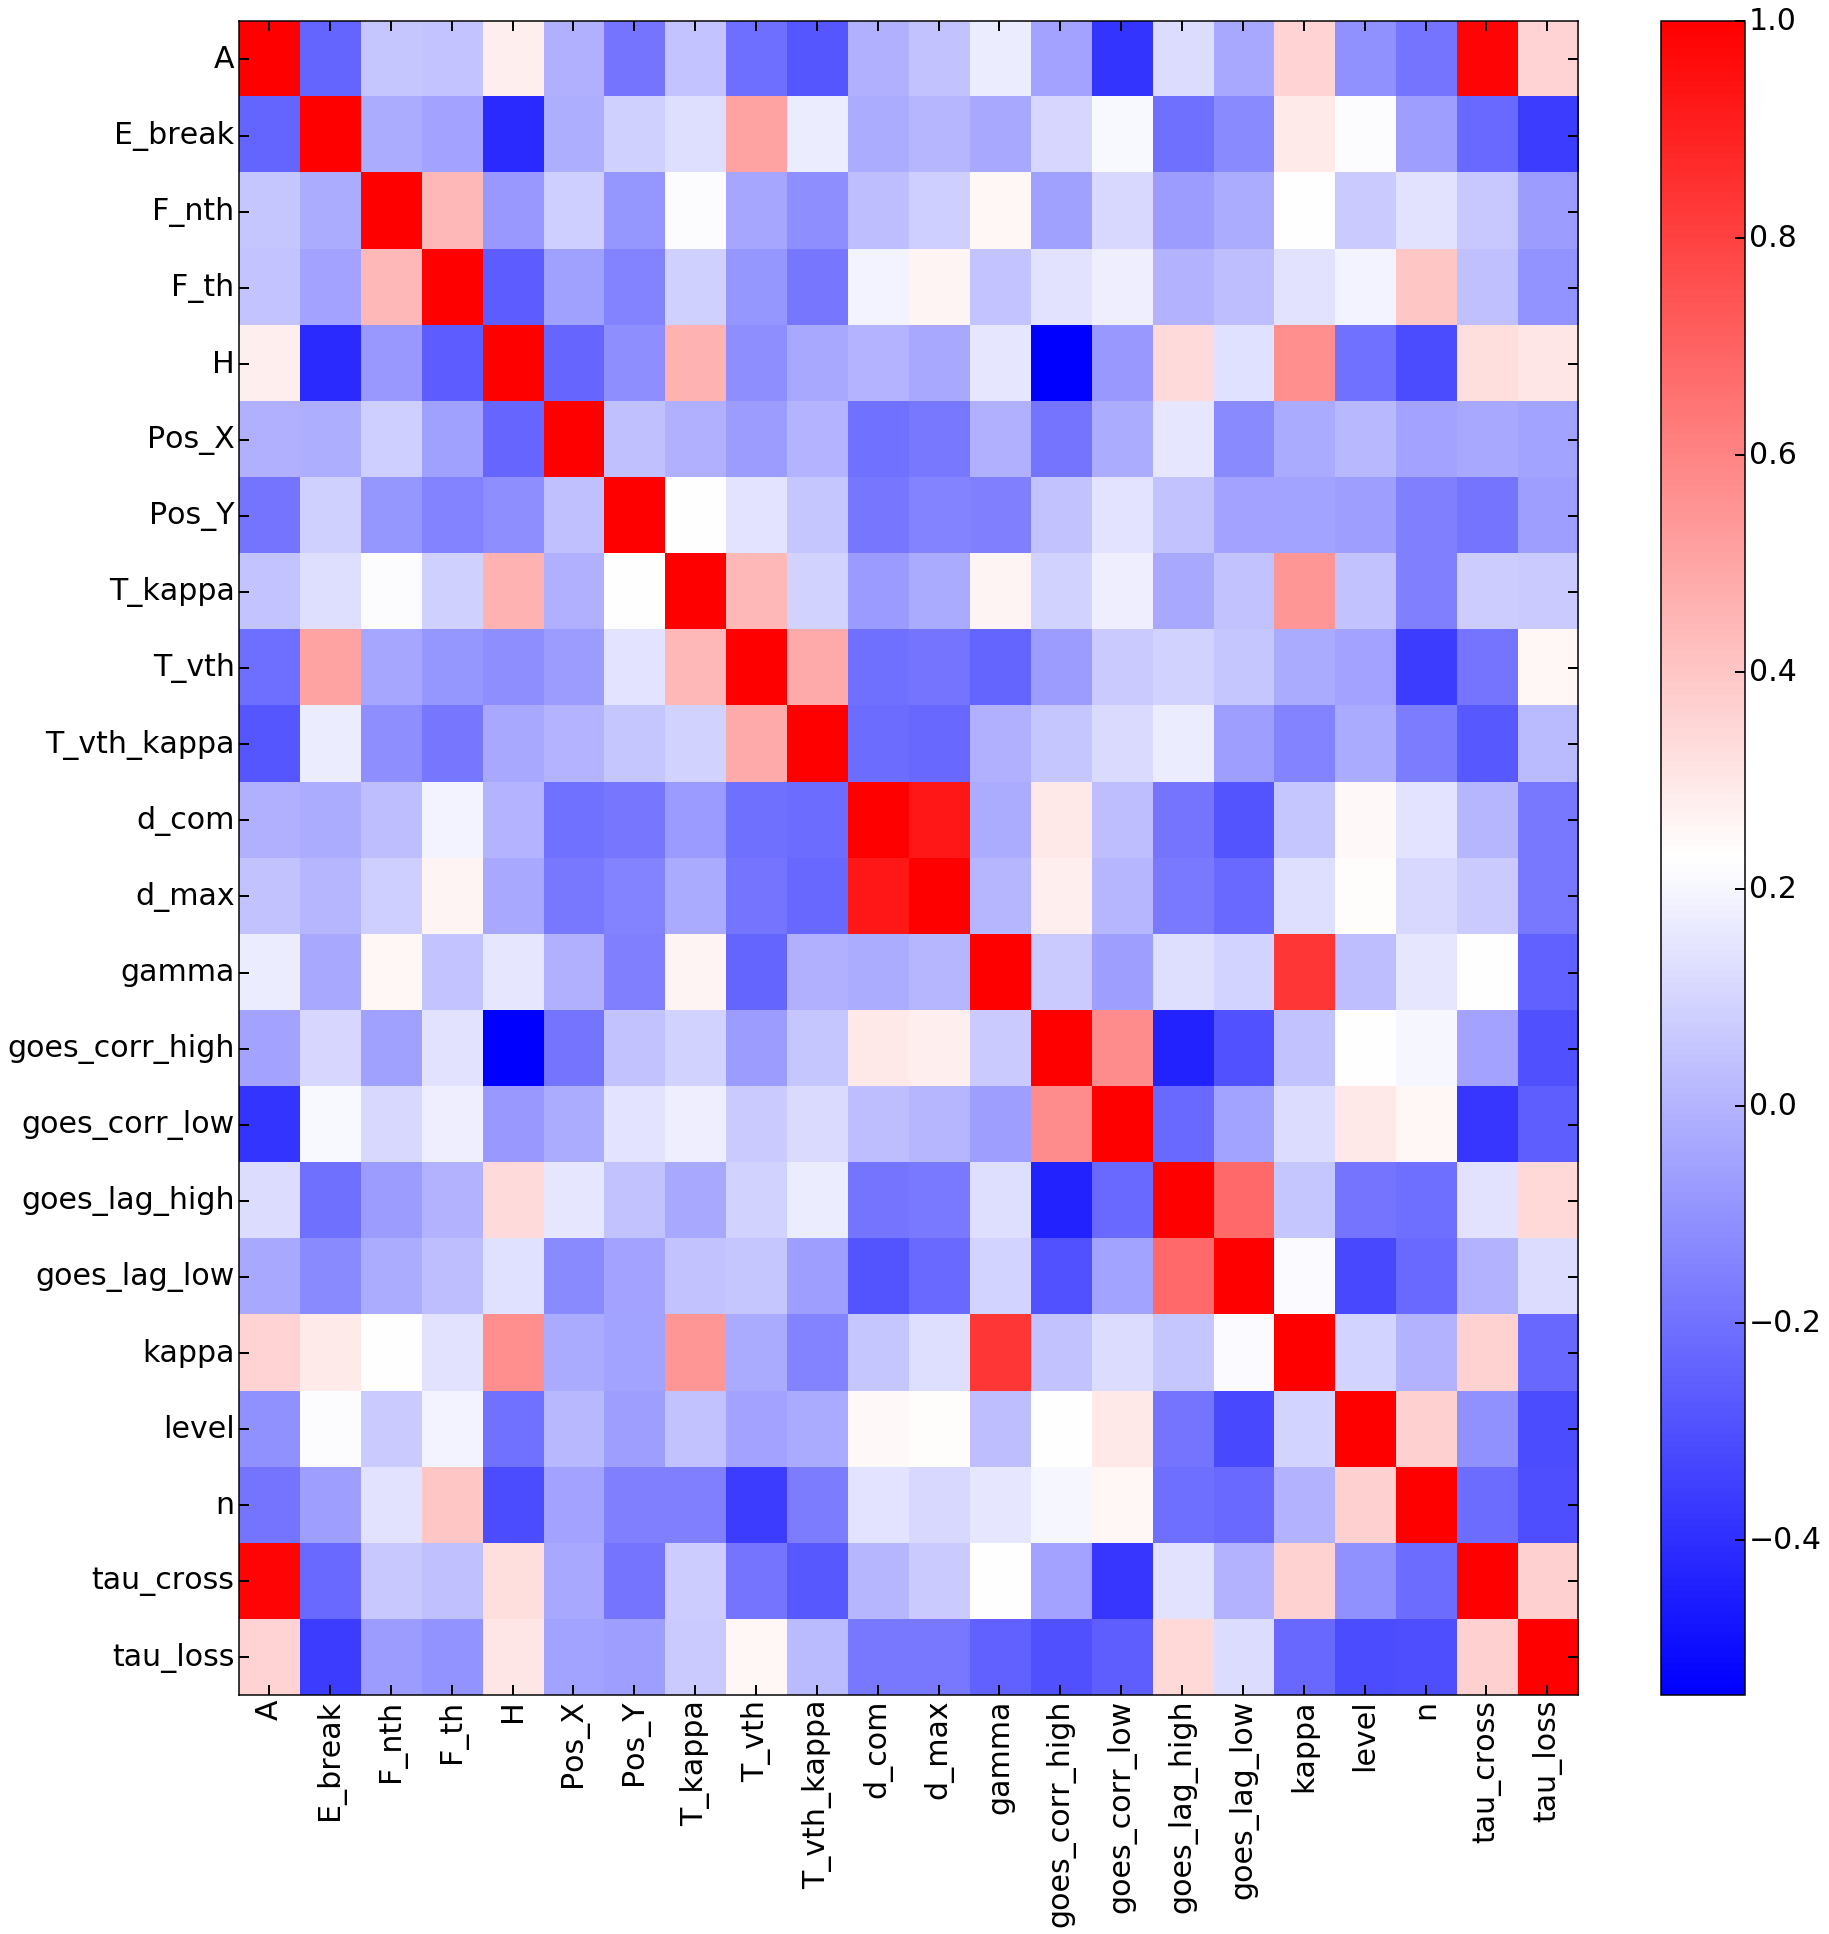

In [20]:
fig, ax = plt.subplots(figsize=(30, 30))
plt.imshow(fit_res[col_names].corr(), interpolation='nearest', aspect='auto', cmap='bwr')
plt.colorbar()
plt.xticks(range(fit_res[col_names].corr().shape[0]), col_names, rotation='vertical')
plt.yticks(range(fit_res[col_names].corr().shape[0]), col_names)
plt.show()

## Further analysis of timescales, energy fluxes and the kappa-gamma relation

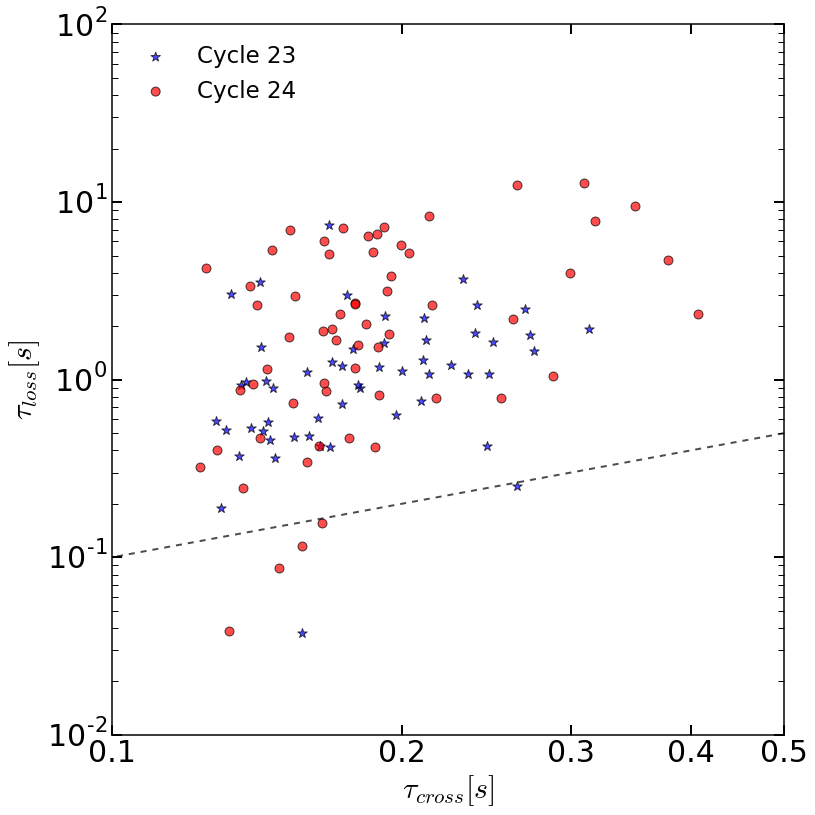

In [21]:
# plot timescales
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(111)
ax.set_xlabel(r"$\tau_{cross} [s]$")
ax.set_ylabel(r"$\tau_{loss} [s]$")
ax.set_xlim([0.1,0.5])
ax.set_ylim([0.01,100])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xticks([0.1,0.2,0.3,0.4,0.5])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.scatter(fit_resK.tau_cross, fit_resK.tau_loss,  c='blue', s=100, marker='*', alpha =0.7,label='$\gamma$')
ax.scatter(fit_resO.tau_cross, fit_resO.tau_loss, c='red',  s=80, alpha =0.7,label='$\gamma$')
ax.legend(['Cycle 23','Cycle 24'], loc='upper left',scatterpoints = 1,prop={'size':23}, frameon=False)
ax.plot(np.arange(0.,10,0.1), np.arange(0.,10,0.1),  ls='--', lw=2, c='black',alpha =0.7,label='$\gamma$')
fig.tight_layout()
fig.savefig('tau_plot_15keV.pdf')
fig.show()

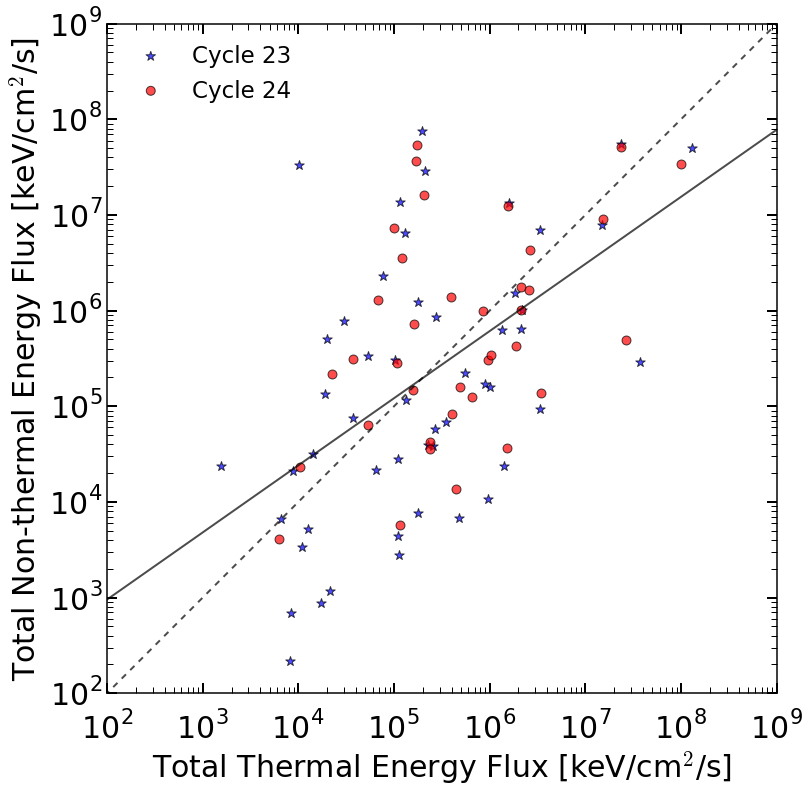

In [22]:
# fit and plot total energy fluxes
mask = (~np.isnan(fit_res['F_th'].values) & ~np.isnan(fit_res['F_nth'].values))
linfit = linregress(np.log10(fit_res['F_th'][mask]),np.log10(fit_res['F_nth'][mask]))

fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(111)
ax.tick_params(axis='x', pad=15)
ax.set_xlabel(r"Total Thermal Energy Flux [keV/cm$^2$/s]")
ax.set_ylabel(r"Total Non-thermal Energy Flux [keV/cm$^2$/s]")
ax.set_xlim([1e2, 1e9])
ax.set_ylim([1e2, 1e9])
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(fit_resK.F_th, fit_resK.F_nth,  c='blue', s=100, marker='*', alpha =0.7,label='$\gamma$')
ax.scatter(fit_resO.F_th, fit_resO.F_nth, c='red',  s=80, alpha =0.7,label='$\gamma$')
ax.legend(['Cycle 23','Cycle 24'], loc='upper left', scatterpoints = 1, prop={'size':23}, frameon=False)
ax.plot(np.arange(1e1,2e9,1e9), np.arange(1e1,2e9,1e9),  ls='--', lw=2, c='black',alpha =0.7,label='$\gamma$')
ax.plot(np.arange(1e1,2e9,1e9), np.arange(1e1,2e9,1e9)**(linfit.slope) * 10**(linfit.intercept),\
        ls='-', lw=2, c='black',alpha =0.7,label='Fit')
fig4.tight_layout()
fig4.savefig('fluxes.pdf')
fig4.show()

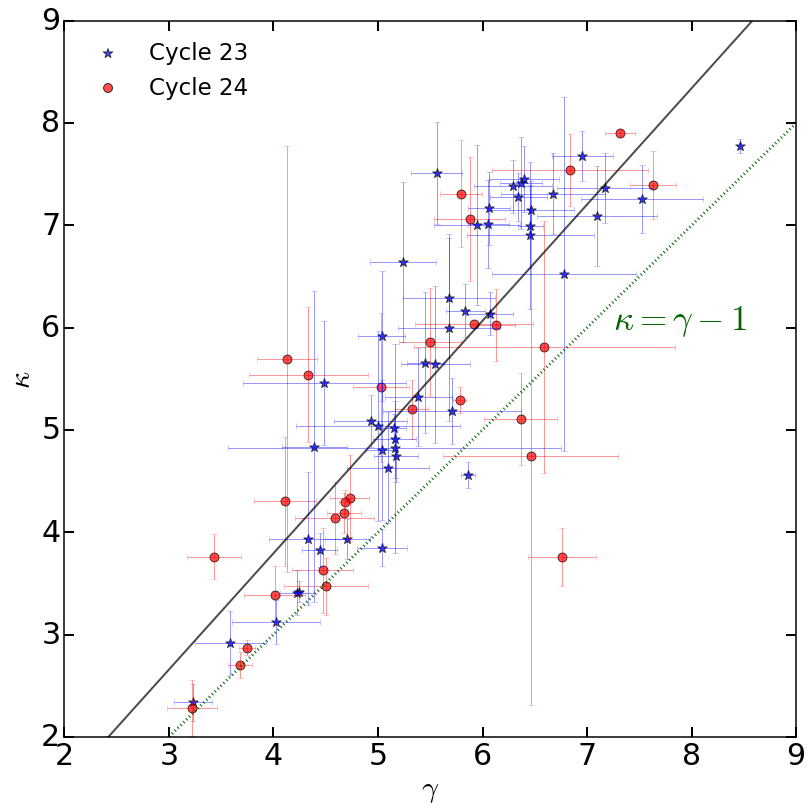

In [23]:
# fit and plot kappa and gamma
mask = (~np.isnan(fit_res['gamma'].values) & ~np.isnan(fit_res['kappa'].values))
linfit = linregress((fit_res['gamma'][mask]),(fit_res['kappa'][mask]))

fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(111)
ax.set_xlabel("$\gamma$")
ax.set_ylabel("$\kappa$")
ax.set_xlim([2,9])
ax.set_ylim([2,9])
ax.scatter(fit_resK.gamma, fit_resK.kappa,  c='blue', s=100, marker='*',alpha =0.7,label='$\gamma$')
ax.scatter(fit_resO.gamma, fit_resO.kappa,  c='red',s=80, alpha =0.7,label='$\gamma$')
ax.legend(['Cycle 23','Cycle 24'], loc='upper left',scatterpoints = 1,prop={'size':23}, frameon=False)
ax.plot(np.arange(0.,10,0.1), np.arange(0.,10,0.1)*linfit.slope + linfit.intercept, ls='-', lw=2, c='black',alpha =0.7,label='Fit')
ax.plot(np.arange(0.,10,0.1), np.arange(0.,10,0.1)-1, ls=':', lw=3, c='darkgreen',alpha =1)
#ax.plot(np.arange(0.,10,0.1), np.arange(0.,10,0.1)+1, ls='-.', lw=3, c='purple',alpha =1)
ax.annotate('$\kappa = \gamma-1$', xy=(0.75, 0.57), xycoords='axes fraction', color='darkgreen',alpha=1,size=35)
#ax.annotate("$\kappa = \gamma+1$", xy=(0.02, 0.44), xycoords='axes fraction', color='purple',alpha=1,size=35)
ax.errorbar(fit_resO.gamma, fit_resO.kappa,\
             xerr=[fit_resO.gamma_err,fit_resO.gamma_err], yerr=[fit_resO.kappa_err,fit_resO.kappa_err], alpha =0.4, c='red',linestyle="None")
ax.errorbar(fit_resK.gamma, fit_resK.kappa,\
             xerr=[fit_resK.gamma_err,fit_resK.gamma_err], yerr=[fit_resK.kappa_err,fit_resK.kappa_err], alpha =0.4, c='blue',linestyle="None")
fig.tight_layout()
fig.savefig('corr_gamma_kappa.pdf')
fig.show()